In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [5]:
qc = QuantumCircuit(3, 2)

In [6]:
oracleCircuit = QuantumCircuit(3,name='oracle')
oracleCircuit.i([0, 1, 2])
# oracleCircuit.i(1)
# oracleCircuit.i(2)
oracleCircuit.to_gate()

Instruction(name='oracle', num_qubits=3, num_clbits=0, params=[])

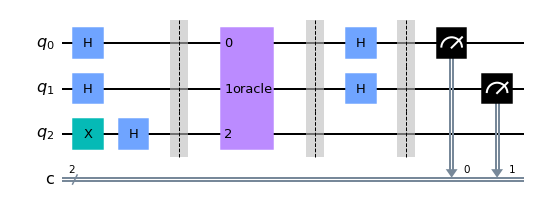

In [7]:
qc.h([0, 1])
qc.x(2)
qc.h(2)
qc.barrier()

qc.append(oracleCircuit, [0, 1, 2])
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.measure([0,1],[0,1])

qc.draw('mpl')

$$
\begin{align}
|\psi_1\rangle &= H | 0\rangle \otimes H | 0 \rangle \otimes ( H X | 0 \rangle ) \\
&= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes H |1\rangle \\
&= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) \\
&= |+\rangle \otimes |+\rangle \otimes |-\rangle \\
&= \frac{1}{2 \sqrt{2}} (|00\rangle + |01\rangle + |10\rangle + |11\rangle) \otimes (|0\rangle - |1\rangle)
\end{align}
$$

$$
\begin{align}
|\psi_2\rangle &= \frac{1}{2 \sqrt{2}} (|00\rangle + |01\rangle + |10\rangle + |11\rangle) \otimes (|0 \oplus f(x_0,x_1) \rangle - |1 \oplus f(x_0,x_1) \rangle) \\
&= \frac{1}{2 \sqrt{2}} \bigg( \\
    & |00 \rangle \otimes |0 \oplus f(x_0,x_1) \rangle - |00 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle \\
    &+ |01 \rangle \otimes |0 \oplus f(x_0,x_1) \rangle - |01 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle \\
    &+ |10 \rangle \otimes |0 \oplus f(x_0,x_1) \rangle - |10 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle \\
    &+ |11 \rangle \otimes |0 \oplus f(x_0,x_1) \rangle - |11 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle
\bigg) \\
&= \frac{1}{2 \sqrt{2}} \bigg( \\
    & |00 \rangle \otimes |f(x_0,x_1) \rangle - |00 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle \\
    &+ |01 \rangle \otimes |f(x_0,x_1) \rangle - |01 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle \\
    &+ |10 \rangle \otimes |f(x_0,x_1) \rangle - |10 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle \\
    &+ |11 \rangle \otimes |f(x_0,x_1) \rangle - |11 \rangle \otimes |1 \oplus f(x_0,x_1) \rangle
\bigg) \\
&= \frac{1}{2 \sqrt{2}} \bigg( \\
    & |00 \rangle \otimes |f(0,0) \rangle - |00 \rangle \otimes |1 \oplus f(0,0) \rangle \\
    &+ |01 \rangle \otimes |f(0,1) \rangle - |01 \rangle \otimes |1 \oplus f(0,1) \rangle \\
    &+ |10 \rangle \otimes |f(1,0) \rangle - |10 \rangle \otimes |1 \oplus f(1,0) \rangle \\
    &+ |11 \rangle \otimes |f(1,1) \rangle - |11 \rangle \otimes |1 \oplus f(1,1) \rangle
\bigg) \\
\end{align}
$$

### Constant

if $f(x_0, x_1) = f(0, 0), \forall x_0, x_1$ (constant)

$$
\begin{align} \\
|\psi_2\rangle &= \frac{1}{2 \sqrt{2}} \bigg( \\
    & |00 \rangle \otimes |f(0,0) \rangle - |00 \rangle \otimes |1 \oplus f(0,0) \rangle \\
    &+ |01 \rangle \otimes |f(0,1) \rangle - |01 \rangle \otimes |1 \oplus f(0,1) \rangle \\
    &+ |10 \rangle \otimes |f(1,0) \rangle - |10 \rangle \otimes |1 \oplus f(1,0) \rangle \\
    &+ |11 \rangle \otimes |f(1,1) \rangle - |11 \rangle \otimes |1 \oplus f(1,1) \rangle
\bigg) \\
&= \frac{1}{2 \sqrt{2}} \bigg( 
      \big( |00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle \big) \otimes |f(0,0) \rangle
    - \big( |00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle \big) \otimes |1 \oplus f(0,0) \rangle
\bigg) \\
&= \frac{1}{2}        \big( |00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle \big) \otimes 
   \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |1 \oplus f(0,0) \rangle \big) \\
&= \frac{1}{\sqrt{2}} \big( |0 \rangle + |1 \rangle \big) \otimes
   \frac{1}{\sqrt{2}} \big( |0 \rangle + |1 \rangle \big) \otimes
   \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |1 \oplus f(0,0) \rangle \big) \\
\\
|\psi_3\rangle &= |0\rangle \otimes |0\rangle \otimes
   \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |1 \oplus f(0,0) \rangle \big) \\ 
\end{align} \\
$$

### Balanced

$\exists f(x_{00}, x_{01}) \neq f(x_{10}, x_{11})$, if $x_{00} \neq x_{10}, x_{01} \neq x_{11}$ and paired

$$
\begin{align} \\
f(x_{00},x_{01}) &= 1 \oplus f(x_{10}, x_{11}) \\
f(x_{10}, x_{11}) &= 1 \oplus f(x_{00},x_{01}), \text{ if } x_{00} \neq x_{10}, x_{01} \neq x_{11}
\end{align} \\
$$

$$
\begin{align} \\
|\psi_2\rangle &= \frac{1}{2 \sqrt{2}} \bigg( \\
    & |00 \rangle \otimes |f(0,0) \rangle - |00 \rangle \otimes |1 \oplus f(0,0) \rangle \\
    &+ |01 \rangle \otimes |f(0,1) \rangle - |01 \rangle \otimes |1 \oplus f(0,1) \rangle \\
    &+ |10 \rangle \otimes |f(1,0) \rangle - |10 \rangle \otimes |1 \oplus f(1,0) \rangle \\
    &+ |11 \rangle \otimes |f(1,1) \rangle - |11 \rangle \otimes |1 \oplus f(1,1) \rangle 
\bigg) \\
\end{align} \\
$$

if $f(0,0) = f(0,1), f(1,0) = f(1,1), f(0,0) \neq f(1,1)$,

$$
\begin{align} \\
|\psi_2\rangle &= \frac{1}{2 \sqrt{2}} \bigg( \\
    &  |00 \rangle \otimes |f(0,0) \rangle - |00 \rangle \otimes |1 \oplus f(0,0) \rangle \\
    &+ |01 \rangle \otimes |f(0,1) \rangle - |01 \rangle \otimes |1 \oplus f(0,1) \rangle \\
    &+ |10 \rangle \otimes |f(1,0) \rangle - |10 \rangle \otimes |1 \oplus f(1,0) \rangle \\
    &+ |11 \rangle \otimes |f(1,1) \rangle - |11 \rangle \otimes |1 \oplus f(1,1) \rangle 
\bigg) \\
&= \frac{1}{2 \sqrt{2}} \bigg( \\
    &  |00 \rangle \otimes |f(0,0) \rangle - |00 \rangle \otimes f(1,1) \rangle \\
    &+ |01 \rangle \otimes |f(0,0) \rangle - |01 \rangle \otimes f(1,1) \rangle \\
    &+ |10 \rangle \otimes |f(1,1) \rangle - |10 \rangle \otimes f(0,0) \rangle \\
    &+ |11 \rangle \otimes |f(1,1) \rangle - |11 \rangle \otimes f(0,0) \rangle
\bigg) \\
&= \frac{1}{2 \sqrt{2}} \bigg( 
      \big( |00 \rangle + |01 \rangle - |10 \rangle - |11 \rangle \big) \otimes |f(0,0) \rangle
    - \big( |00 \rangle + |01 \rangle - |10 \rangle - |11 \rangle \big) \otimes |f(1,1) \rangle
\bigg) \\
&= \frac{1}{2 \sqrt{2}} \bigg(
    \big( |00 \rangle + |01 \rangle - |10 \rangle - |11 \rangle \big) \otimes
    \big( |f(0,0) \rangle - |f(1,1) \rangle \big)
\bigg) \\
&= \frac{1}{2}        \big( |00 \rangle + |01 \rangle - |10 \rangle - |11 \rangle \big) \otimes
   \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |f(1,1) \rangle \big) \\
&= \frac{1}{2}
    \big(
        |0\rangle \otimes (|0\rangle + |1\rangle) - |1\rangle \otimes (|0\rangle + |1\rangle)
    \big)  \otimes
    \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |f(1,1) \rangle \big) \\
&=  \frac{1}{\sqrt{2}} \big( |0\rangle - |1\rangle \big) \otimes
    \frac{1}{\sqrt{2}} \big( |0\rangle + |1\rangle \big) \otimes
    \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |f(1,1) \rangle \big) \\
\\
|\psi_3\rangle &= |1\rangle \otimes
    |0\rangle \otimes
    \frac{1}{\sqrt{2}} \big( |f(0,0) \rangle - |f(1,1) \rangle \big) \\
\end{align} \\
$$

# 좀 더 수학적인 방법으로 표현해보자

참조 : https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

![Deutsch-Jozsa Algorithm](./deutsch_steps.png)

$$
\begin{align} \\
|\psi_0\rangle &= |0\rangle ^{\otimes n} |1\rangle ^{\otimes n} \\
\\
|\psi_1\rangle &= \big( H^{\otimes n} |0\rangle^{\otimes n} \big) \otimes H |1\rangle 
= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle \bigg) \big( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \big)
= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle \bigg) |-\rangle \\
\\
|\psi_2\rangle &= U_f | \psi_1 \rangle \\
&= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle \bigg) \big( \frac{|0 \oplus f(x)\rangle - |1 \oplus f(x) \rangle}{\sqrt{2}} \big) \\
&= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle \bigg) \big( \frac{|f(x)\rangle - |1 \oplus f(x) \rangle}{\sqrt{2}} \big) \\
\text{if } f(x) = 0 \\
|\psi_2\rangle &= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle \bigg) \big( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \big) \\
&= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} (-1)^{0} |x\rangle \bigg) \big( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \big) \\
\text{if } f(x) = 1 \\
|\psi_2\rangle &= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} |x\rangle \bigg) \big( - \frac{|0\rangle - |1\rangle}{\sqrt{2}} \big) \\
&= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} (-1)^{1} |x\rangle \bigg) \big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \big) \\
\text{so } \\
|\psi_2\rangle &= \bigg( \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} (-1)^{f(x)} |x\rangle \bigg) \big( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \big) \\
&= \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} (-1)^{f(x)} |x\rangle |-\rangle \\
\\
|\psi_3\rangle &= \big(H^{\otimes n} \otimes I \big) |\psi_2\rangle \\
&= \frac{1}{\sqrt{2^n}} \sum_{x=0} ^{2^n-1} (-1)^{f(x)} \frac{1}{\sqrt{2^n}} \sum_{z=0} ^{2^n-1} (-1)^{x \cdot z} |z\rangle |-\rangle \\
&= \frac{1}{2^n} \sum_{x=0} ^{2^n-1} (-1)^{f(x)} \sum_{z=0} ^{2^n-1} (-1)^{x \cdot z} |z\rangle |-\rangle \\
&= \frac{1}{2^n} \sum_{z=0} ^{2^n-1} \bigg( \sum_{x=0} ^{2^n-1} (-1)^{f(x)} (-1)^{x\cdot z} \bigg) |z\rangle |-\rangle \\
\end{align} \\
$$

4단계에서 $|\psi_3\rangle$의 First Register가 $|0 \rangle ^{\otimes n}$일 확률을 측정해보자.

$f(x)$가 constant인 경우,

$(-1)^{f(x)}$ 은 $-1 또는 1$ 이다. 1이라고 가정하면 $\sum_{x=0} ^{2^n-1} (-1)^{x \cdot z}$는,
$x, z$가 모두 0인 경우만 부호가 1이고, 다른 경우는 반은 1이고 반은 -1으로 서로 cancel out되어 0인 경우만 남게 되어,
$|0 \rangle ^{\otimes n}$의 확률이 1이된다.

$f(x)$가 balanced인 경우,

문제의 정의에 따라서 $(-1)^{f(x)}$의 절반은 1이고, 나머지 절반은 -1이 되어, $z$가 0인 경우의 $\sum_{x=0} ^{2^n-1} (-1)^{f(x)} (-1)^{x \cdot z}$가 cancel out되어 확률이 0이된다.